In [1]:
import pandas as pd
import requests
import datetime
import json

## Web Scraping

In [2]:
Api_key = "c35caa2391472c618c88a5b9810c28c75b36e6b7a97a0e8dc2d28d447ceec170"

In [8]:
url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=EUR&limit=2000"

In [9]:
res = requests.get(url, Api_key).json()
result = res["Data"]["Data"]
result


[{'time': 1443571200,
  'high': 0.6683,
  'low': 0.5495,
  'open': 0.5877,
  'volumefrom': 11742.03,
  'volumeto': 7258.08,
  'close': 0.6586,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1443657600,
  'high': 0.66,
  'low': 0.571,
  'open': 0.6586,
  'volumefrom': 7735.29,
  'volumeto': 4699.65,
  'close': 0.6234,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1443744000,
  'high': 0.6235,
  'low': 0.569,
  'open': 0.6234,
  'volumefrom': 3820.02,
  'volumeto': 2284.2,
  'close': 0.6039,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1443830400,
  'high': 0.6356,
  'low': 0.6009,
  'open': 0.603,
  'volumefrom': 228153.37,
  'volumeto': 139572.29,
  'close': 0.6117,
  'conversionType': 'multiply',
  'conversionSymbol': 'BTC'},
 {'time': 1443916800,
  'high': 0.6066,
  'low': 0.5896,
  'open': 0.621,
  'volumefrom': 2248.63,
  'volumeto': 1347.54,
  'close': 0.6012,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {

## Converting to Pandas. Dataframe

In [10]:
data = pd.json_normalize(result)

In [11]:
data.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1443571200,0.6683,0.5495,0.5877,11742.03,7258.08,0.6586,direct,
1,1443657600,0.6600,0.5710,0.6586,7735.29,4699.65,0.6234,direct,
2,1443744000,0.6235,0.5690,0.6234,3820.02,2284.20,0.6039,direct,
3,1443830400,0.6356,0.6009,0.6030,228153.37,139572.29,0.6117,multiply,BTC
4,1443916800,0.6066,0.5896,0.6210,2248.63,1347.54,0.6012,direct,


<AxesSubplot:>

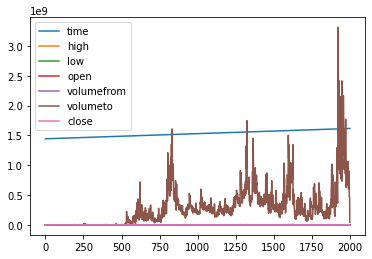

In [12]:
data.plot()

## Converting to datetime datatype

In [13]:
data["time"] = [datetime.datetime.fromtimestamp(d) for d in data.time]
data.tail()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
1996,2021-03-18 01:00:00,1518.48,1474.40,1520.78,419352.11,6.258102e+08,1492.33,multiply,BTC
1997,2021-03-19 01:00:00,1523.71,1498.80,1492.33,311221.65,4.736022e+08,1521.75,multiply,BTC
1998,2021-03-20 01:00:00,1537.70,1511.81,1521.75,314823.45,4.776459e+08,1517.19,multiply,BTC
1999,2021-03-21 01:00:00,1528.81,1489.66,1517.19,305816.66,4.595537e+08,1502.71,multiply,BTC
2000,2021-03-22 01:00:00,1518.46,1479.04,1502.44,29890.72,4.479623e+07,1514.50,direct,


## Converting and Exporting pd.DataFrame to CSV

In [15]:
data.to_csv(r"\\wsl$\Ubuntu\home\sayo\code\Feyisayomi\CryptoPrediction\raw_data\crypto.csv", index=False, header=True)